In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load your processed CSV
df = pd.read_csv("../data/sentiment_reviews.csv")

# Basic cleanup
df['sentiment_label'] = df['sentiment_label'].str.lower()
df['review'] = df['review'].astype(str)


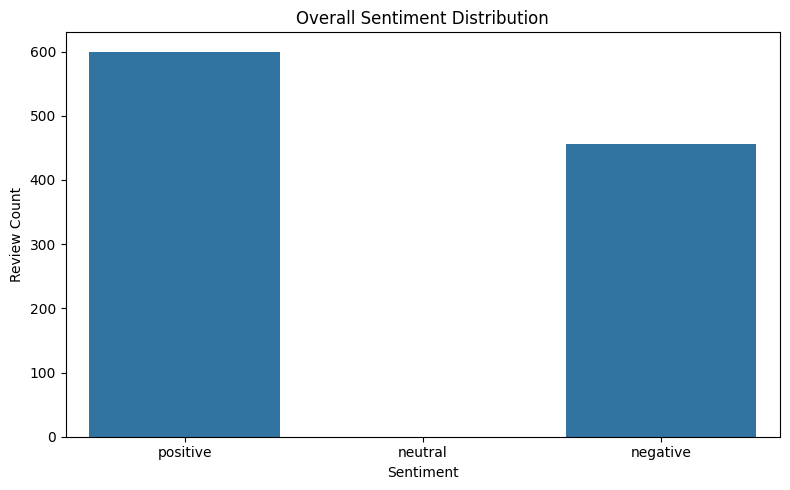

In [8]:
# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, order=['positive', 'neutral', 'negative'])
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()


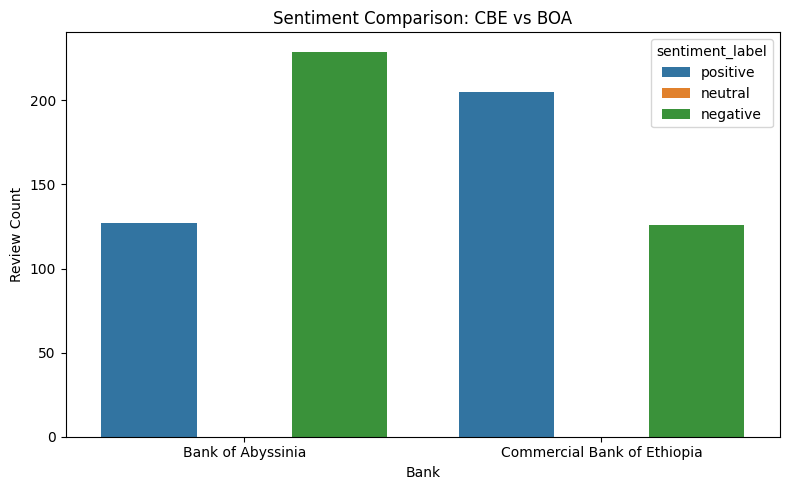

In [10]:
top_banks = ['Commercial Bank of Ethiopia', 'Bank of Abyssinia']
df_filtered = df[df['bank'].isin(top_banks)]

plt.figure(figsize=(8, 5))
sns.countplot(x='bank', hue='sentiment_label', data=df_filtered,
              hue_order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Comparison: CBE vs BOA")
plt.xlabel("Bank")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()


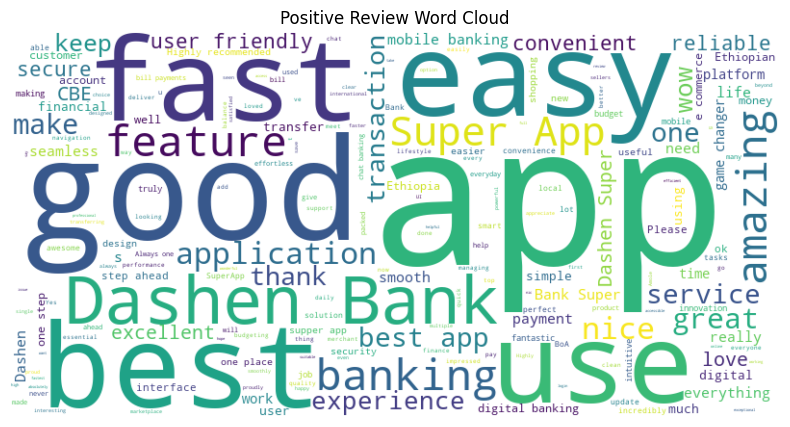

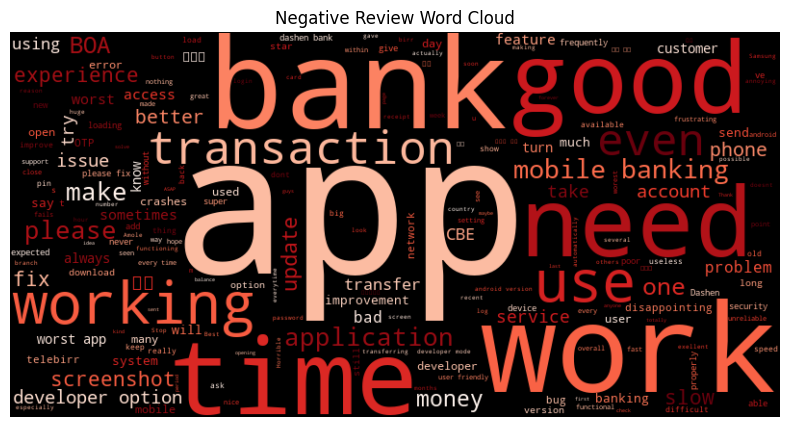

In [12]:
# Separate by sentiment
positive_text = " ".join(df[df['sentiment_label'] == 'positive']['review'].values)
negative_text = " ".join(df[df['sentiment_label'] == 'negative']['review'].values)

# Word Cloud - Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Review Word Cloud")
plt.show()

# Word Cloud - Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Review Word Cloud")
plt.show()
